<a href="https://colab.research.google.com/github/bugraonsoz/ForestFireDataset/blob/main/ForestFires.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montesinho Park'ta Gerçekleşen Yangınların Veri Seti

---
***Kullanılan veri seti Portekiz'deki Montesinho doğal parkından gelen 517 yangını içermektedir. Her olay için haftanın günü, ayı, koordinatları ve yanan alanın yanı sıra yağmur, sıcaklık, nem ve rüzgar gibi çeşitli meteorolojik veriler de kaydediliyor.
Böylece bu veriler sayesinde oluşabilecek durumları kontrol edebiliriz.***




In [160]:
# Kütüphaneleri ekliyoruz.
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm

%matplotlib inline
sns.set_style('darkgrid')

In [111]:
!unzip forest+fires.zip forestfires.csv # Zip dosyasını çıkartıyoruz.

Archive:  forest+fires.zip
replace forestfires.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [114]:
forest_df=pd.read_csv("forestfires.csv")

In [115]:
forest_df.head() # İlk 5 satırı okutuyoruz.

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [116]:
forest_df.shape # Veri Setinin kaç satır ve kaç sütundan oluştuğuna bakıyoruz.

(517, 13)

In [117]:
forest_df.info() # Adlandırılan sütunların türünün ne olduğuna bakıyoruz.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB


In [118]:
forest_df.describe(include=['O']) # Object türündeki sütunların kaç tane değer , benzersiz değer , en çok kullanılan değer , ve en çok tekrar eden değerin frekansını öğrenebiliriz.

,month,day
count,517,517
unique,12,7
top,aug,sun
freq,184,95


In [119]:
summary = forest_df.describe(include=[np.number]) # Sayısal türdeki sütunların ortalama, max-min değerlerini vb. özelliklerini görebiliriz.
print(summary)

                X           Y        FFMC         DMC          DC         ISI  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807   90.644681  110.872340  547.940039    9.021663   
std      2.313778    1.229900    5.520111   64.046482  248.066192    4.559477   
min      1.000000    2.000000   18.700000    1.100000    7.900000    0.000000   
25%      3.000000    4.000000   90.200000   68.600000  437.700000    6.500000   
50%      4.000000    4.000000   91.600000  108.300000  664.200000    8.400000   
75%      7.000000    5.000000   92.900000  142.400000  713.900000   10.800000   
max      9.000000    9.000000   96.200000  291.300000  860.600000   56.100000   

             temp          RH        wind        rain         area  
count  517.000000  517.000000  517.000000  517.000000   517.000000  
mean    18.889168   44.288201    4.017602    0.021663    12.847292  
std      5.806625   16.317469    1.791653    0.295959    63.655

In [120]:
categorical_feature = forest_df.describe(include=['O']).columns # İlerde bir takım işlem yapılmasına karşın kolaylık sağlanması için bir değişken üzerinden object nesneler tanımlanmıştır.
print(categorical_feature)

Index(['month', 'day'], dtype='object')


In [121]:
forest_df['FFMC'].value_counts() # 'FFMC' adlı sütunun tüm değerlerine bakılır.

,count
FFMC,
92.1,28
91.6,28
91.0,22
91.7,19
92.4,16
...,...
86.9,1
85.2,1
53.4,1


In [122]:
numerical_feature = forest_df.describe(include=[np.number]).columns # İlerde bir takım işlem yapılmasına karşın kolaylık sağlanması için bir değişken üzerinden sayısal nesneler tanımlanmıştır.
print(numerical_feature)

Index(['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain',
       'area'],
      dtype='object')


In [123]:
forest_df.sort_values(by="area", ascending=False).head() # 'area' sütunu üzerinden azalan değerler olacak şekilde sıralanıştır.

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
238,6,5,sep,sat,92.5,121.1,674.4,8.6,25.1,27,4.0,0.0,1090.84
415,8,6,aug,thu,94.8,222.4,698.6,13.9,27.5,27,4.9,0.0,746.28
479,7,4,jul,mon,89.2,103.9,431.6,6.4,22.6,57,4.9,0.0,278.53
237,1,2,sep,tue,91.0,129.5,692.6,7.0,18.8,40,2.2,0.0,212.88
236,2,2,sep,sat,92.5,121.1,674.4,8.6,18.2,46,1.8,0.0,200.94


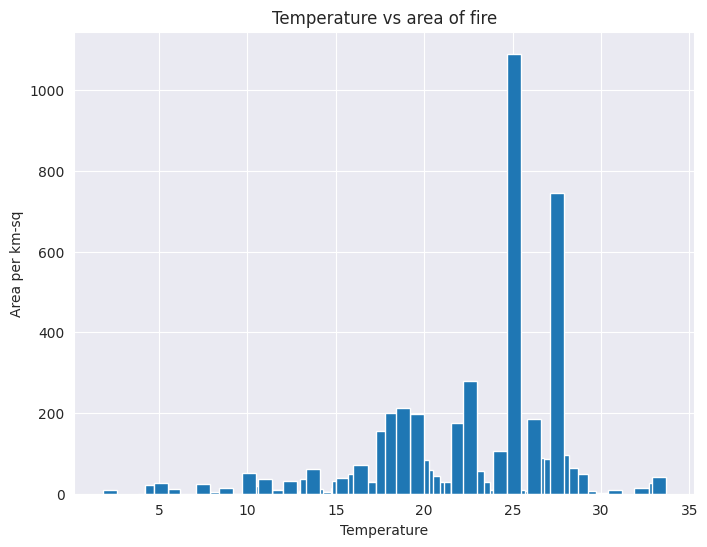

In [124]:
highest_fire_area=forest_df.sort_values(by=["area"], ascending=[True]) # Burada tüm forest.df() verisindeki sütünları alır ancak bir koşul olmadığı sürece karışık bir grafik elde ederiz. Bunun için "area" sütünu üzerinden artan sıralama ile değerlendirdik.

plt.figure(figsize=(8, 6)) # 8'e 6'lık bir grafik oluşturur.

plt.title("Temperature vs area of fire" ) # Grafiği adlandırdık.
plt.bar(highest_fire_area['temp'], highest_fire_area['area']) # X ekseni için 'temp', Y ekseni için 'area' yaptık.

plt.xlabel("Temperature") # Eksenleri adlandırdık.
plt.ylabel("Area per km-sq") # Eksenleri adlandırdık.
plt.show() # Grafiği Göster.

# Bu grafikte sıcaklığın artmasıyla yanan alanın artması arasında bir ilişki olmamasına karşın, optimum bir sıcaklık sonucunda yanması ihtimalini değerlendirebiliriz.
# Ancak, 25 derece bizim için optimum sıcaklıktır gibi net bir şey söyleyemeyiz. Bunun için diğer değerlere de bakıp bir sonuç çıkartmamız gerekir.

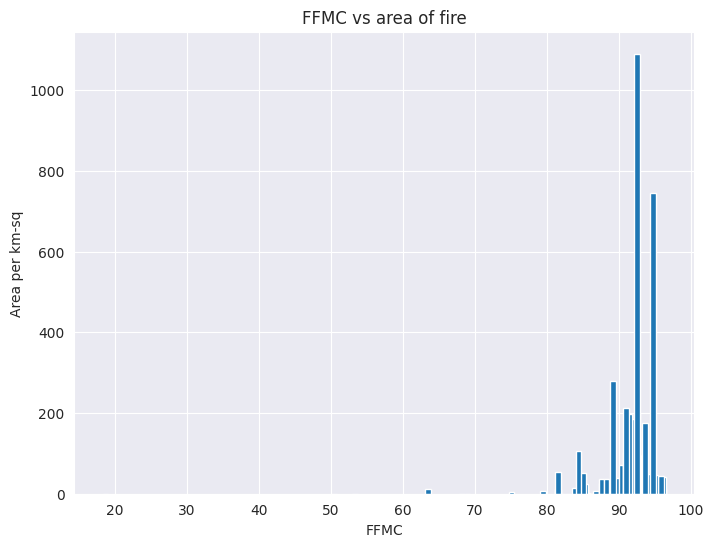

In [125]:
highest_fire_area=forest_df.sort_values(by=["area"], ascending=[True])

plt.figure(figsize=(8, 6)) # 8'e 6'lık bir grafik oluşturur.

plt.title("FFMC vs area of fire" ) # Grafiği adlandırdık.
plt.bar(highest_fire_area['FFMC'], highest_fire_area['area']) # X ekseni için 'FFMC', Y ekseni için 'area' yaptık.

plt.xlabel("FFMC") # Eksenleri adlandırdık.
plt.ylabel("Area per km-sq") # Eksenleri adlandırdık.
plt.show() # Grafiği Göster.

# Burada bir sonuç elde ettik. FFMC'nin max değerinin 96.2 olmasını ele alırsak, 92.5 değerindeyken area'nın en büyük olduğu değere ulaştık ancak hala doğru bir orantı yakalayamadık.

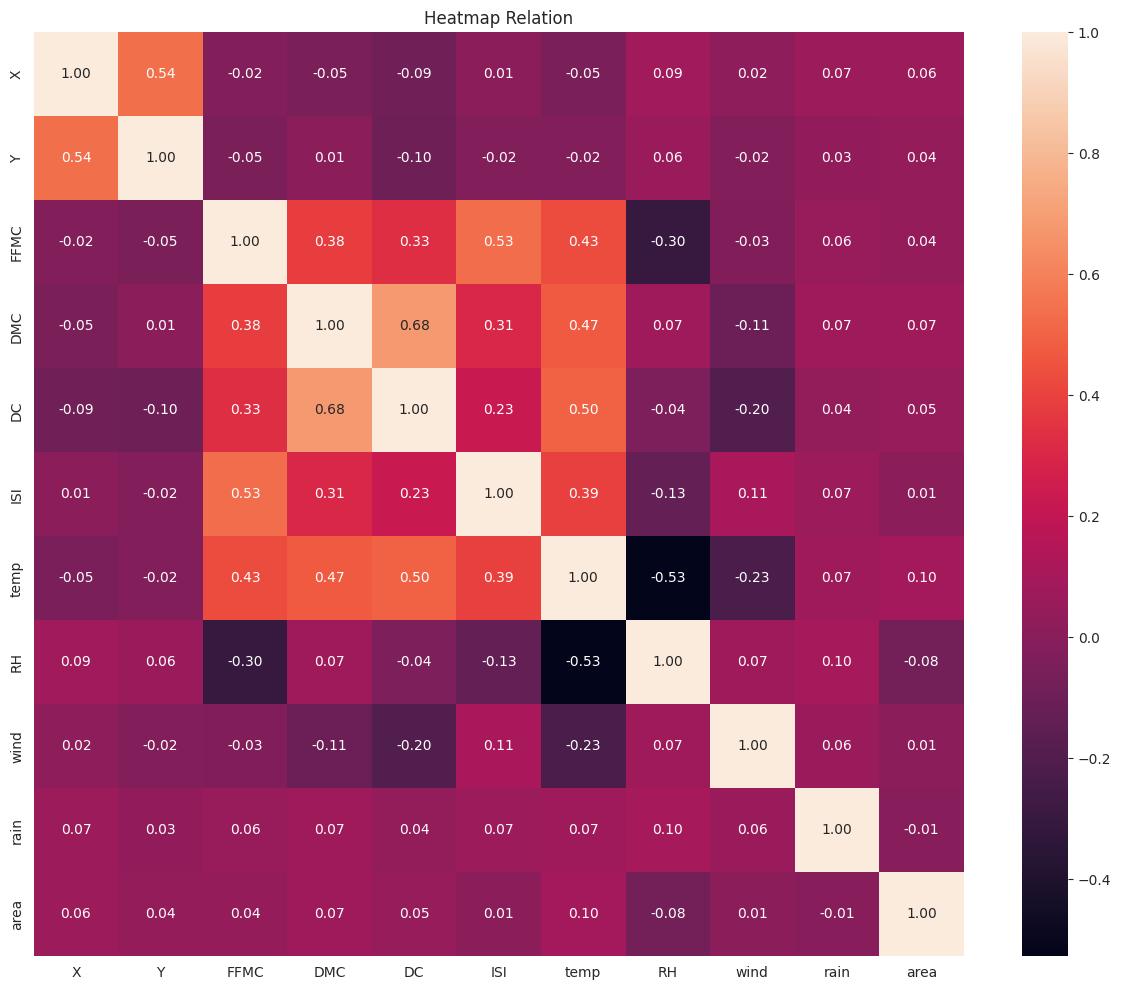

In [126]:
plt.figure(figsize=(15, 12))

plt.title("Heatmap Relation")

sns.heatmap(forest_df[numerical_feature].corr(), annot=True, fmt='.2f');

# Bu grafik sayesinde hangi sütunların birbiriyle doğru orantılı olduğunu kontrol edebiliriz. Burada 'area' ile en çok bağdaşlaşan sütun olarak 'temp' i kabul edebiliriz. Ondan sonra 'temp' e yakın 'DC' var. Sonra 'DC' ye yakın 'DMC', sonra 'FFMC' ye yakın olan 'ISI', ona en yakın olarak ise 'temp' e ulaşıyoruz.


Index(['month', 'day'], dtype='object')


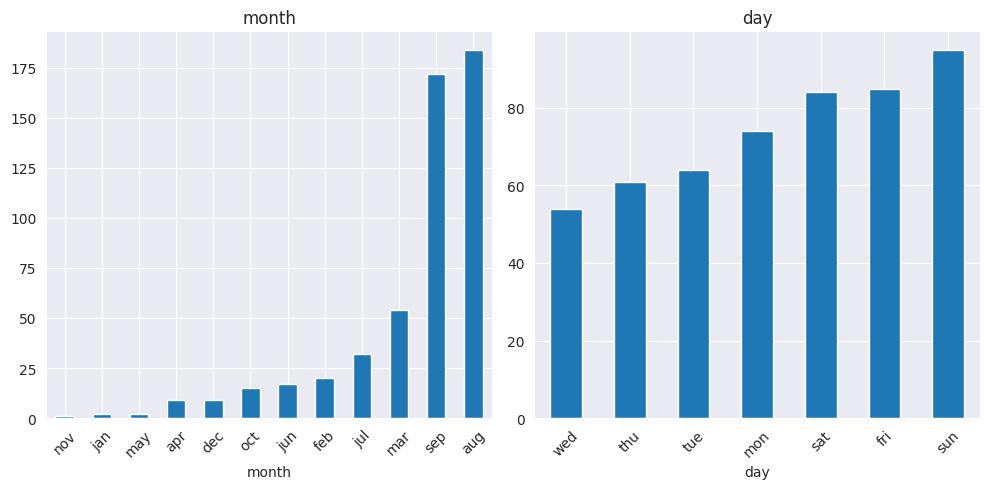

In [127]:
print(categorical_feature) # Üstteki kod dizisinde bundan bahsetmiştik. Kategorik sütunları görebiliriz.


plt.figure(figsize=(10, 5))
for idx, column in enumerate(categorical_feature):
    df = forest_df.copy()
    unique = df[column].value_counts(ascending=True)

    # Her kategorik özelliği subplot'ta görselleştir
    plt.subplot(1, len(categorical_feature), idx+1)  # Alt grafik oluşturuluyor
    unique.plot(kind='bar')

    plt.title(column)  # Başlık olarak sütun adını ekle
    plt.xticks(rotation=45)  # X eksenindeki yazıları döndür
    plt.tight_layout()

# En çok Ağustos ayı ve Pazar günününde yangın vakalarının yaşandığını görüyoruz.

In [128]:
highest_rain = forest_df.sort_values(by='rain', ascending=False)[['month', 'day', 'rain']].head()
highest_rain # Burada ay,gün ve yağmur oranı olan sütunları yağmurun azalan sıralamasıyla bir tablo oluşturduk.

,month,day,rain
499,aug,tue,6.4
509,aug,fri,1.4
243,aug,sun,1.0
500,aug,tue,0.8
501,aug,tue,0.8


# Ayların sıcaklık miktarını görüyoruz.

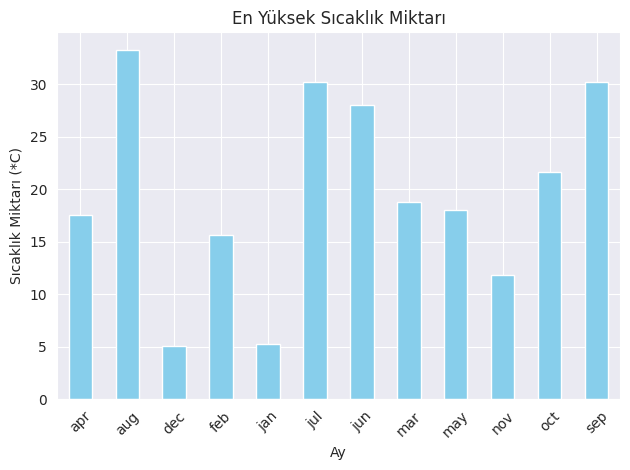

In [129]:

# Her ay için en yüksek yağış miktarını bulma
max_temp_per_month = df.groupby('month')['temp'].max()

# En yüksek yağış miktarlarını sütun grafiği olarak çizme
max_temp_per_month.plot(kind='bar', color='skyblue')

# Grafiği düzenleme
plt.title('En Yüksek Sıcaklık Miktarı')
plt.xlabel('Ay')
plt.ylabel('Sıcaklık Miktarı (*C)')
plt.xticks(rotation=45)  # X ekseni etiketlerini döndürme
plt.tight_layout()

# Grafiği gösterme
plt.show()

In [130]:
aug_temps = forest_df[forest_df['month'] == 'aug']['temp']
aug_mean_temp = aug_temps.mean()

print(f"Ağustos aylarının sıcaklık ortalaması: {aug_mean_temp}")

Ağustos aylarının sıcaklık ortalaması: 21.631521739130434


In [131]:
area_temps = forest_df['area']
area_mean_temp = area_temps.mean()

print(f"Çıkan Yangınların Area(Alan) Ortalaması: {area_mean_temp}")

Çıkan Yangınların Area(Alan) Ortalaması: 12.847292069632493


In [132]:
area_isi = forest_df['ISI']
area_mean_isi = area_isi.mean()

print(f"Yangının Yayılma Potansiyelinin Ortalaması: {area_mean_isi}")

Yangının Yayılma Potansiyelinin Ortalaması: 9.021663442940039


In [162]:
area_dc = forest_df['DC']
area_mean_dc = area_dc.mean()

print(f"Kuraklık Koşullarının Ortalaması: {area_mean_dc}")

Kuraklık Koşullarının Ortalaması: 547.9400386847195


In [133]:
numeric_features = [feature for feature in forest_df.columns if forest_df[feature].dtype != 'O']
categorical_features = [feature for feature in forest_df.columns if forest_df[feature].dtype == 'O']


print('{} tane sayısal sütunumuz var  : {}'.format(len(numeric_features), numeric_features))
print('\n{} tane kategorik sütunumuz var : {}'.format(len(categorical_features), categorical_features))

11 tane sayısal sütunumuz var  : ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']

2 tane kategorik sütunumuz var : ['month', 'day']


In [134]:
geometric_mean = np.exp(np.log(forest_df['FFMC']).mean()) #aritmetik ortalama
geometric_mean #Çöplerin Yakıt Oranı

90.37350731660581

In [135]:
harmonic_mean = len(forest_df['temp']) / forest_df['temp'].apply(lambda x: 1 / x).sum() #harmonik ortalama
harmonic_mean

16.08176161495816

In [136]:
forest_df['temp'].median()

19.3

In [137]:
forest_df['DC'].mode() #Kuraklık Koşulları

,DC
0,745.3


In [138]:
forest_df['temp'].min(),forest_df['temp'].max()

(2.2, 33.3)

In [139]:
forest_df['rain'].var() #Varyans

0.08759180123851079

In [140]:
forest_df['temp'].std() #standart sapma

5.806625349573505

In [141]:
forest_df['area'].skew() #genel çarpıklık

12.846933533934868

In [142]:
forest_df['wind'].kurtosis() #genel basıklık

0.0543238171099949

# 'RH' sütununda hangi değerin kaç kere kullanıldığını görüyoruz.

Text(0, 0.5, 'Counts')

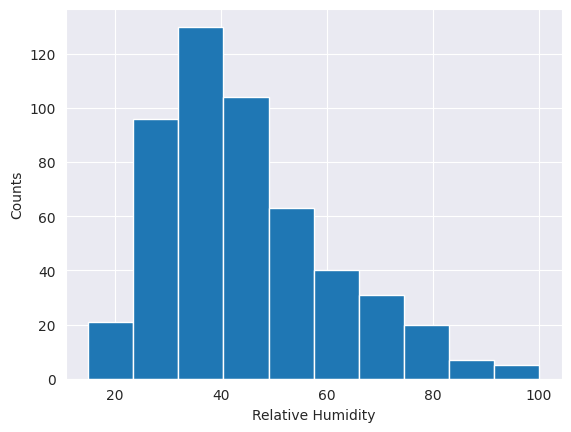

In [143]:
forest_df['RH'].hist() #histogram
plt.xlabel('Relative Humidity') #Bağıl Nem
plt.ylabel('Counts')

In [144]:
temp_greater_than_25 = (forest_df['rain'] >0) & (forest_df['rain']<30)

# 21'den yüksek değerlerin sayısını ve toplam geçerli değer sayısını bulma
count_greater_than_25 = temp_greater_than_25.sum()
total_valid_values = forest_df['rain'].notnull().sum()

# Olasılığı hesaplama
probability = count_greater_than_25 / total_valid_values

print("rain değerinin 25'den yüksek olma olasılığı:", probability)

rain değerinin 25'den yüksek olma olasılığı: 0.015473887814313346


# Sıcaklığın yangına etkisi için bir hipotez oluşturuyoruz. Bu hipotezde sıcaklığın yangına etkisi olup olmadığına bakıyoruz.

In [145]:

# Null değerleri çıkarma
cleaned_temps = forest_df['temp'].dropna()

# Hipotez edilen ortalama
mu_0 = 21.63

# Örneklem ortalaması
sample_mean = cleaned_temps.mean()

# Örneklem standart sapması
sample_std = cleaned_temps.std(ddof=1)

# Örneklem büyüklüğü
n = cleaned_temps.count()

# Z-test istatistiği
z = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# İki kuyruklu test için p-değeri
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Örneklem Ortalaması: {sample_mean}")
print(f"Örneklem Standart Sapması: {sample_std}")
print(f"Örneklem Büyüklüğü: {n}")
print(f"Z-Test İstatistiği: {z}")
print(f"P-Değeri: {p_value}")

# Sonucu yorumlama
alpha = 0.05
if p_value > alpha:
    print("Hipotez reddedilir.")
else:
    print("Hipotez reddedilemez.")


Örneklem Ortalaması: 18.88916827852998
Örneklem Standart Sapması: 5.806625349573505
Örneklem Büyüklüğü: 517
Z-Test İstatistiği: -10.732572671990539
P-Değeri: 0.0
Hipotez reddedilemez.


# *Hipotezimiz Doğru. Sıcaklığın yangına etkisi var.*

In [164]:
# Null değerleri çıkarma
cleaned_dc = forest_df['DC'].dropna()

# Hipotez edilen ortalama
mu_0 = 547.94

# Örneklem ortalaması
sample_mean = cleaned_dc.mean()

# Örneklem standart sapması
sample_std = cleaned_dc.std(ddof=1)

# Örneklem büyüklüğü
n = cleaned_isi.count()

# Z-test istatistiği
z = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

# İki kuyruklu test için p-değeri
p_value = 2 * (1 - stats.norm.cdf(abs(z)))

print(f"Örneklem Ortalaması: {sample_mean}")
print(f"Örneklem Standart Sapması: {sample_std}")
print(f"Örneklem Büyüklüğü: {n}")
print(f"Z-Test İstatistiği: {z}")
print(f"P-Değeri: {p_value}")

# Sonucu yorumlama
alpha = 0.05
if p_value > alpha:
    print("Hipotez reddedilir.")
else:
    print("Hipotez reddedilemez.")

Örneklem Ortalaması: 547.9400386847195
Örneklem Standart Sapması: 248.06619170584364
Örneklem Büyüklüğü: 517
Z-Test İstatistiği: 3.5458237445928504e-06
P-Değeri: 0.9999971708419788
Hipotez reddedilir.


#*Burada ise kuraklık koşullarının yangına etkisinin olmadığını gördük.*

# Kutu grafiği sayesinde, her ay için ISI değerlerinin medyanını, yayılımını ve uç değerlerini kolayca görebilirsiniz.

<Axes: title={'center': 'ISI'}, xlabel='month'>

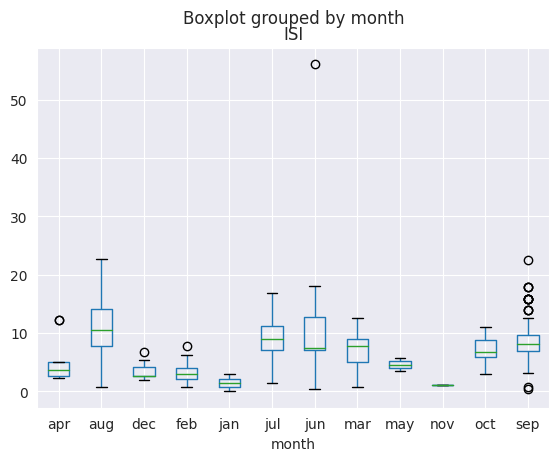

In [148]:
forest_df.boxplot('ISI', by='month') #yangının yayılma potansiyeli